<h1 align='center'>Data Science Analysis Assignment 1</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from astroML import stats as astroML_stats
import csv

# Question 1

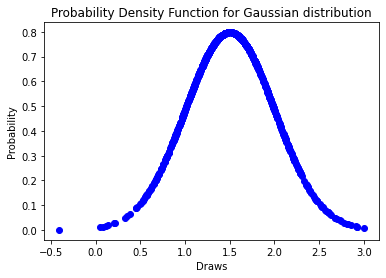

In [2]:
normal_dist = stats.norm(loc = 1.5, scale = 0.5)
normal_draws = normal_dist.rvs(size = 1000)
normal_pdf = normal_dist.pdf(normal_draws)

plt.scatter(normal_draws, normal_pdf, color = "blue")
plt.title("Probability Density Function for Gaussian distribution")
plt.xlabel("Draws")
plt.ylabel("Probability")
plt.show()

In [3]:
mean = np.mean(normal_draws)
variance = np.var(normal_draws)
skewness = stats.skew(normal_draws)
kurtosis = stats.kurtosis(normal_draws)
median = np.median(normal_draws)
MAD = np.median(np.abs(normal_draws - median))
stddev_formula = 1.482 * MAD
q25, q75 = np.percentile(normal_draws, [25, 75])
sigmaG_formula = 0.7413 * (q75 - q25)
sigmaG_astroML = astroML_stats.sigmaG(normal_draws)

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Standard Deviation from MAD: {stddev_formula}")
print(f"sigma_G from formula: {sigmaG_formula}")
print(f"sigma_G from AstroML library: {sigmaG_astroML}")

Mean: 1.5077303748876378
Variance: 0.24215465116414042
Skewness: 0.06980456702928421
Kurtosis: 0.08957920516858398
Standard Deviation from MAD: 0.4916735619822914
sigma_G from formula: 0.5007643666846792
sigma_G from AstroML library: 0.5007651160092123


# Question 2

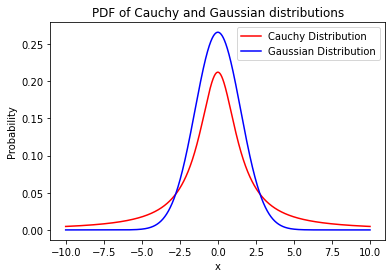

In [4]:
x = np.linspace(-10, 10, 10000)
cauchy_dist = stats.cauchy(loc = 0, scale = 1.5)
cauchy_pdf = cauchy_dist.pdf(x)
normal_dist = stats.norm(loc = 0, scale = 1.5)
normal_pdf = normal_dist.pdf(x)

plt.plot(x, cauchy_pdf, label = "Cauchy Distribution", color = "red")
plt.plot(x, normal_pdf, label = "Gaussian Distribution", color = "blue")
plt.legend(loc = "upper right")
plt.title("PDF of Cauchy and Gaussian distributions")
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

# Question 3

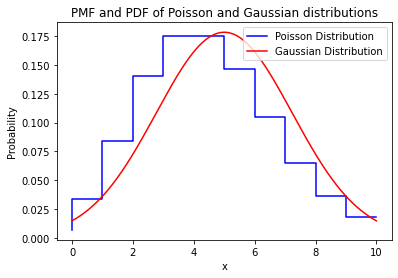

In [5]:
x = np.arange(0, 11, 1)
y = np.linspace(0, 10, 10000)
poisson_pmf = stats.poisson.pmf(x, 5)
normal_dist = stats.norm(loc = 5, scale = (5 ** 0.5))
normal_pdf = normal_dist.pdf(y)

plt.step(x, poisson_pmf, label = "Poisson Distribution", color = "blue")
plt.plot(y, normal_pdf, label = "Gaussian Distribution", color = "red")
plt.legend(loc = "upper right")
plt.title("PMF and PDF of Poisson and Gaussian distributions")
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

# Question 4

In [6]:
mean = np.array([0.8920, 0.881, 0.8913, 0.9837, 0.8958])
uncertainty_mean = np.array([0.00044, 0.009, 0.00032, 0.00048, 0.00045])
weighted_mean = np.average(mean, weights = 1 / (uncertainty_mean ** 2))
uncertainty_in_mean = (1 / np.sum(1 / (uncertainty_mean ** 2))) ** 0.5

print(f"Calculated weighted mean lifetime: {weighted_mean}")
print(f"Uncertainty in weighted mean: {uncertainty_in_mean}")

Calculated weighted mean lifetime: 0.9089185199574896
Uncertainty in weighted mean: 0.00020318737026848627


# Question 5

In [7]:
ecc = []
eccentricity = []
with open('exoplanet.eu_catalog.csv', mode ='r') as file:
    csvFile = csv.reader(file)
    line = 0
    for lines in csvFile:
        if line == 0:
            ind = lines.index('eccentricity')
        else:
            if lines[ind] not in ['', 0]:
                ecc.append(lines[ind])
        line += 1
for e in ecc:
    if float(e) > 0:
        eccentricity.append(float(e))

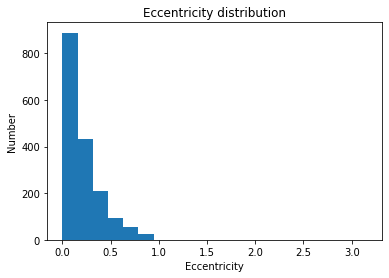

In [8]:
plt.hist(eccentricity, bins = 20)
plt.title("Eccentricity distribution")
plt.xlabel("Eccentricity")
plt.ylabel("Number")
plt.show()

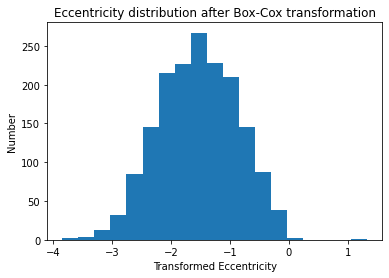

In [9]:
transformed_eccentricity = stats.boxcox(eccentricity)[0]
plt.hist(transformed_eccentricity, bins = 19)
plt.title("Eccentricity distribution after Box-Cox transformation")
plt.xlabel("Transformed Eccentricity")
plt.ylabel("Number")
plt.show()